In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#check what tables are in Hawaii db
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
dates = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
date_most_recent =dates[0]
print(date_most_recent)


('2017-08-23',)


2016-08-23


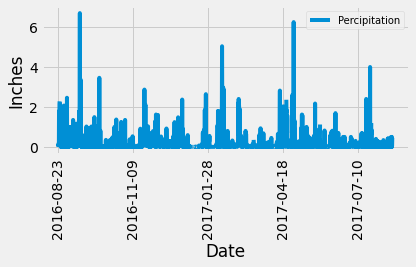

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_before_recent)

# Perform a query to retrieve the data and precipitation scores
year_percp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before_recent).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(year_percp)
prcp_df=prcp_df.rename(columns={0:"Date"})
prcp_df=prcp_df.rename(columns={1:"Percipitation"})
prcp_df = prcp_df.set_index(prcp_df.Date)
prcp_df=prcp_df[['Percipitation']]
prcp_df.head()
# Sort the dataframe by date
prcp_sorted= prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data


prcp_sorted.plot()
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc= "upper right", prop={'size': 10})
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_sorted.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station.name).count()
print(number_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
for station in station_activity:
    print(station)
most_active=station_activity[0][0]
print(most_active)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
USC00519281


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station  == most_active)
low_temp = list(low_temp)
print(low_temp)

high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active)
high_temp =list(high_temp)
print(high_temp)

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active)
avg_temp=list(avg_temp)
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


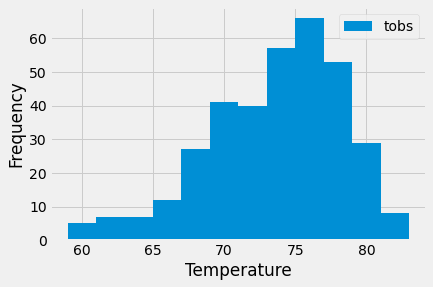

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= year_before_recent).\
    order_by(Measurement.date.desc()).all()

tobs_most_active = []
for tob in most_active_tobs:
    tobs_most_active.append(tob[0])
plt.hist(tobs_most_active, bins =12, label='tobs')
plt.legend(loc='upper right')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Close Session
session.close()